### Carga de datos

In [1]:
import os
import gc
import numpy as np
import pandas as pd
from functools import reduce

pd.set_option("display.max_columns", 100)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
ruta = '../data/ecobici/viajes.parquet'
df = pd.read_parquet(ruta)
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo
0,M,29,5210661,134,147,2023-09-30 23:55:54,2023-10-01 00:00:16
1,M,26,8316747,045,147,2023-09-30 23:46:57,2023-10-01 00:00:32
2,M,30,3749272,384,337,2023-09-30 23:50:50,2023-10-01 00:00:34
3,F,40,2961233,014,018,2023-09-30 23:50:24,2023-10-01 00:00:36
4,F,34,2661924,155,139,2023-09-30 23:55:48,2023-10-01 00:00:39


In [3]:
df.shape, df.dtypes

((33893476, 7),
 Genero_Usuario                   object
 Edad_Usuario                      int32
 Bici                              int32
 Ciclo_Estacion_Retiro            object
 Ciclo_EstacionArribo             object
 fh_retiro                datetime64[ns]
 fh_arribo                datetime64[ns]
 dtype: object)

In [4]:
df['Genero_Usuario'].value_counts()

Genero_Usuario
M    23542761
F     9615995
O      689703
?       45017
Name: count, dtype: int64

### Ingeniería de Variables

> _¿Cuántas mujeres utilizarán la ecobici en el siguiente mes?_
> La tabla debe de tener bien identificada la unidad muestral con el prefijo "UM_" , las variables con su respectiva nomenclatura "v_", "c_", etc. y la variable objetivo con el nombre "y".

* Unidad muestral: Numero de Mujeres, Mes

In [5]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo
0,M,29,5210661,134,147,2023-09-30 23:55:54,2023-10-01 00:00:16
1,M,26,8316747,045,147,2023-09-30 23:46:57,2023-10-01 00:00:32
2,M,30,3749272,384,337,2023-09-30 23:50:50,2023-10-01 00:00:34
3,F,40,2961233,014,018,2023-09-30 23:50:24,2023-10-01 00:00:36
4,F,34,2661924,155,139,2023-09-30 23:55:48,2023-10-01 00:00:39


In [6]:
df['fh_retiro'] = pd.to_datetime(df['fh_retiro'])
df['fh_arribo'] = pd.to_datetime(df['fh_arribo'])
df['c_genero'] = df['Genero_Usuario']
df['UM_año'] = df['fh_retiro'].map( lambda x: x.year ).astype('Int32')
df['UM_mes'] = df['fh_retiro'].map( lambda x: x.month ).astype('Int32')
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,fh_retiro,fh_arribo,c_genero,UM_año,UM_mes
0,M,29,5210661,134,147,2023-09-30 23:55:54,2023-10-01 00:00:16,M,2023,9
1,M,26,8316747,045,147,2023-09-30 23:46:57,2023-10-01 00:00:32,M,2023,9
2,M,30,3749272,384,337,2023-09-30 23:50:50,2023-10-01 00:00:34,M,2023,9
3,F,40,2961233,014,018,2023-09-30 23:50:24,2023-10-01 00:00:36,F,2023,9
4,F,34,2661924,155,139,2023-09-30 23:55:48,2023-10-01 00:00:39,F,2023,9


In [7]:
test = df # reserva

In [8]:
df = df[['fh_retiro', 'UM_año', 'UM_mes', 'c_genero']]
df

,fh_retiro,UM_año,UM_mes,c_genero
0,2023-09-30 23:55:54,2023,9,M
1,2023-09-30 23:46:57,2023,9,M
2,2023-09-30 23:50:50,2023,9,M
3,2023-09-30 23:50:24,2023,9,F
4,2023-09-30 23:55:48,2023,9,F
...,...,...,...,...
1829758,2024-03-31 23:33:51,2024,3,F
1829759,2024-03-31 23:41:08,2024,3,F
1829760,2024-03-31 23:34:00,2024,3,M
1829761,2024-03-31 23:26:00,2024,3,M


### Generacion de la TAD

In [9]:
df

,fh_retiro,UM_año,UM_mes,c_genero
0,2023-09-30 23:55:54,2023,9,M
1,2023-09-30 23:46:57,2023,9,M
2,2023-09-30 23:50:50,2023,9,M
3,2023-09-30 23:50:24,2023,9,F
4,2023-09-30 23:55:48,2023,9,F
...,...,...,...,...
1829758,2024-03-31 23:33:51,2024,3,F
1829759,2024-03-31 23:41:08,2024,3,F
1829760,2024-03-31 23:34:00,2024,3,M
1829761,2024-03-31 23:26:00,2024,3,M


In [10]:
df[df['UM_año'] == 2022]

,fh_retiro,UM_año,UM_mes,c_genero
466859,2022-11-05 13:12:09,2022,11,M
554294,2022-10-07 15:29:21,2022,10,O
70986,2022-12-07 08:44:17,2022,12,F
149499,2022-12-08 15:12:46,2022,12,O
149933,2022-11-15 16:52:21,2022,11,M
1098734,2022-09-30 12:24:36,2022,9,O
1421508,2022-08-19 14:44:45,2022,8,M


In [11]:
df.drop(df[df['UM_año'] == 2022].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_35654/633580557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['UM_año'] == 2022].index, inplace=True)


,fh_retiro,UM_año,UM_mes,c_genero
0,2023-09-30 23:55:54,2023,9,M
1,2023-09-30 23:46:57,2023,9,M
2,2023-09-30 23:50:50,2023,9,M
3,2023-09-30 23:50:24,2023,9,F
4,2023-09-30 23:55:48,2023,9,F
...,...,...,...,...
33893327,2024-03-31 23:33:51,2024,3,F
33893328,2024-03-31 23:41:08,2024,3,F
33893329,2024-03-31 23:34:00,2024,3,M
33893330,2024-03-31 23:26:00,2024,3,M


In [12]:
df_pivot = df.pivot_table(df, 
                          index=['UM_año', 'UM_mes'], 
                          columns='c_genero', 
                          aggfunc="count")
df_pivot

fh_retiro                              
c_genero              ?         F          M        O
UM_año UM_mes                                        
2023   1            NaN       1.0        NaN      NaN
       2            NaN      20.0       50.0      3.0
       3            9.0  218866.0   578466.0  20681.0
       4            2.0  224561.0   569467.0  19535.0
       5           11.0  257228.0   666227.0  21705.0
       6            9.0  276584.0   710695.0  22760.0
       7            2.0  274898.0   702083.0  22628.0
       8            4.0  302830.0   781987.0  24399.0
       9            4.0  333365.0   830425.0  25899.0
       10           4.0  401671.0   971303.0  28788.0
       11           3.0  400872.0   980462.0  29350.0
       12           NaN  337824.0   865212.0  25162.0
2024   1            9.0  439526.0  1087401.0  31224.0
       2           13.0  486896.0  1178041.0  34497.0
       3           10.0  538355.0  1254624.0  36640.0
       4            4.0  572523.0  1351643.0  37551.0
       5            9.0  282712.0   668011.0  18568.0
       6           10.0  549269.0  1307083.0  36862.0
       7           16.0  521101.0  1268613.0  36023.0
       8           19.0  543344.0  1310858.0  37114.0
       9           25.0  537241.0  1279350.0  35403.0
       10         506.0  594019.0  1420648.0  39347.0
       11        8972.0  553716.0  1341197.0  38416.0
       12       15143.0  466353.0  1166145.0  32715.0
2025   1        20233.0  502184.0  1252667.0  34428.0

In [13]:
df_pivot.columns

MultiIndex([('fh_retiro', '?'),
            ('fh_retiro', 'F'),
            ('fh_retiro', 'M'),
            ('fh_retiro', 'O')],
           names=[None, 'c_genero'])

In [14]:
[i for i in df_pivot.columns]

[('fh_retiro', '?'),
 ('fh_retiro', 'F'),
 ('fh_retiro', 'M'),
 ('fh_retiro', 'O')]

In [15]:
['v_retiro_' + i[1] for i in df_pivot.columns]

['v_retiro_?', 'v_retiro_F', 'v_retiro_M', 'v_retiro_O']

In [16]:
df_pivot.columns = ['v_retiro_' + i[1] for i in df_pivot.columns]

In [17]:
df_pivot.columns

Index(['v_retiro_?', 'v_retiro_F', 'v_retiro_M', 'v_retiro_O'], dtype='object')

In [18]:
df_pivot

v_retiro_?  v_retiro_F  v_retiro_M  v_retiro_O
UM_año UM_mes                                                
2023   1              NaN         1.0         NaN         NaN
       2              NaN        20.0        50.0         3.0
       3              9.0    218866.0    578466.0     20681.0
       4              2.0    224561.0    569467.0     19535.0
       5             11.0    257228.0    666227.0     21705.0
       6              9.0    276584.0    710695.0     22760.0
       7              2.0    274898.0    702083.0     22628.0
       8              4.0    302830.0    781987.0     24399.0
       9              4.0    333365.0    830425.0     25899.0
       10             4.0    401671.0    971303.0     28788.0
       11             3.0    400872.0    980462.0     29350.0
       12             NaN    337824.0    865212.0     25162.0
2024   1              9.0    439526.0   1087401.0     31224.0
       2             13.0    486896.0   1178041.0     34497.0
       3             10.0    538355.0   1254624.0     36640.0
       4              4.0    572523.0   1351643.0     37551.0
       5              9.0    282712.0    668011.0     18568.0
       6             10.0    549269.0   1307083.0     36862.0
       7             16.0    521101.0   1268613.0     36023.0
       8             19.0    543344.0   1310858.0     37114.0
       9             25.0    537241.0   1279350.0     35403.0
       10           506.0    594019.0   1420648.0     39347.0
       11          8972.0    553716.0   1341197.0     38416.0
       12         15143.0    466353.0   1166145.0     32715.0
2025   1          20233.0    502184.0   1252667.0     34428.0

In [19]:
df_pivot.index

MultiIndex([(2023,  1),
            (2023,  2),
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  8),
            (2023,  9),
            (2023, 10),
            (2023, 11),
            (2023, 12),
            (2024,  1),
            (2024,  2),
            (2024,  3),
            (2024,  4),
            (2024,  5),
            (2024,  6),
            (2024,  7),
            (2024,  8),
            (2024,  9),
            (2024, 10),
            (2024, 11),
            (2024, 12),
            (2025,  1)],
           names=['UM_año', 'UM_mes'])

In [20]:
df_pivot.reset_index(drop=False, inplace=True)
df_pivot

,UM_año,UM_mes,v_retiro_?,v_retiro_F,v_retiro_M,v_retiro_O
0,2023,1,NaN,1.0,NaN,NaN
1,2023,2,NaN,20.0,50.0,3.0
2,2023,3,9.0,218866.0,578466.0,20681.0
3,2023,4,2.0,224561.0,569467.0,19535.0
4,2023,5,11.0,257228.0,666227.0,21705.0
5,2023,6,9.0,276584.0,710695.0,22760.0
6,2023,7,2.0,274898.0,702083.0,22628.0
7,2023,8,4.0,302830.0,781987.0,24399.0
8,2023,9,4.0,333365.0,830425.0,25899.0
9,2023,10,4.0,401671.0,971303.0,28788.0


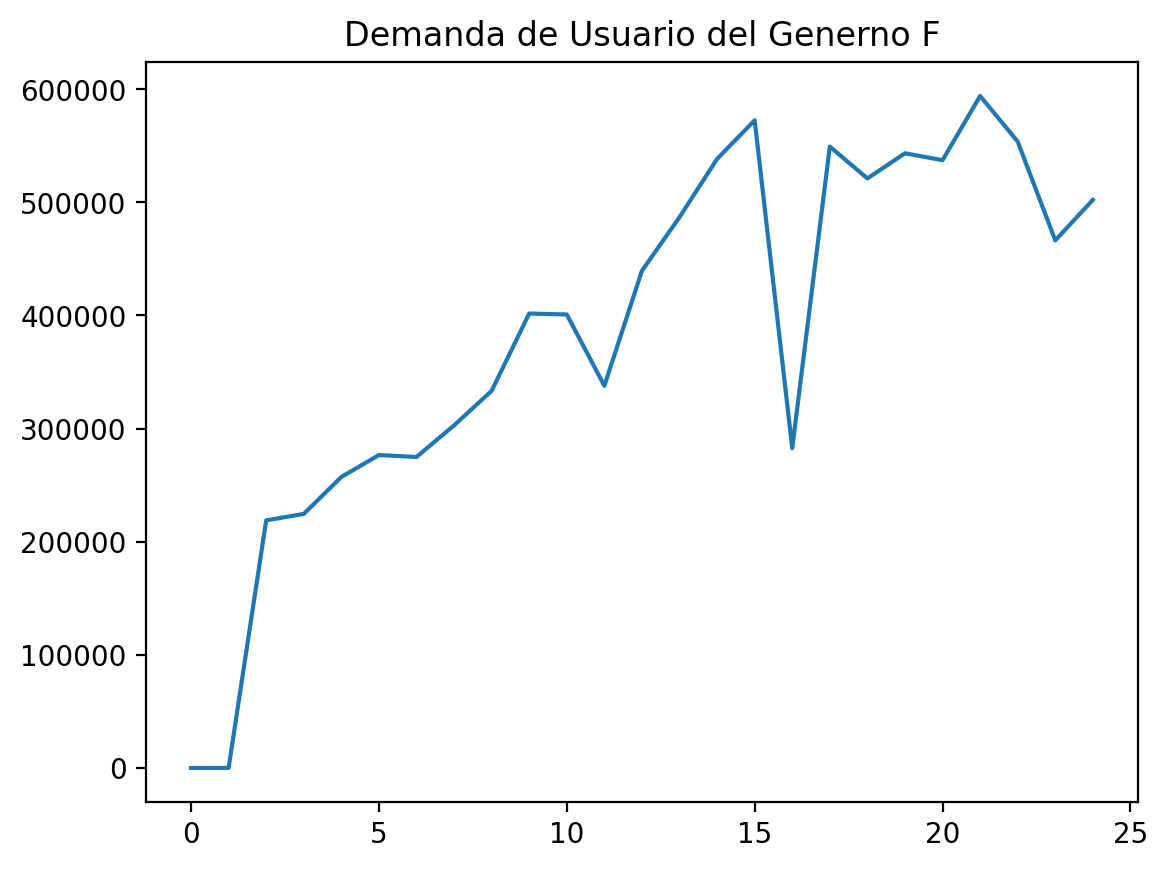

In [21]:
import matplotlib.pyplot as plt

plt.plot(df_pivot.index, df_pivot['v_retiro_F'])
plt.title("Demanda de Usuario del Generno F")
#plt.xticks(df_gen['c_año'])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## Ventanas de tiempo

In [22]:
df_pivot.reset_index(drop=False, inplace=True)
df_pivot['index'] = df_pivot['index']+1
df_pivot

,index,UM_año,UM_mes,v_retiro_?,v_retiro_F,v_retiro_M,v_retiro_O
0,1,2023,1,NaN,1.0,NaN,NaN
1,2,2023,2,NaN,20.0,50.0,3.0
2,3,2023,3,9.0,218866.0,578466.0,20681.0
3,4,2023,4,2.0,224561.0,569467.0,19535.0
4,5,2023,5,11.0,257228.0,666227.0,21705.0
5,6,2023,6,9.0,276584.0,710695.0,22760.0
6,7,2023,7,2.0,274898.0,702083.0,22628.0
7,8,2023,8,4.0,302830.0,781987.0,24399.0
8,9,2023,9,4.0,333365.0,830425.0,25899.0
9,10,2023,10,4.0,401671.0,971303.0,28788.0


In [23]:
df_pivot['v_retiro_?'] = df_pivot['v_retiro_?'].fillna(0).astype(int)
df_pivot['v_retiro_F'] = df_pivot['v_retiro_F'].fillna(0).astype(int)
df_pivot['v_retiro_M'] = df_pivot['v_retiro_M'].fillna(0).astype(int)
df_pivot['v_retiro_O'] = df_pivot['v_retiro_O'].fillna(0).astype(int)
df_pivot

,index,UM_año,UM_mes,v_retiro_?,v_retiro_F,v_retiro_M,v_retiro_O
0,1,2023,1,0,1,0,0
1,2,2023,2,0,20,50,3
2,3,2023,3,9,218866,578466,20681
3,4,2023,4,2,224561,569467,19535
4,5,2023,5,11,257228,666227,21705
5,6,2023,6,9,276584,710695,22760
6,7,2023,7,2,274898,702083,22628
7,8,2023,8,4,302830,781987,24399
8,9,2023,9,4,333365,830425,25899
9,10,2023,10,4,401671,971303,28788


In [24]:
df_pivot['v_retiro_total'] = df_pivot['v_retiro_?'].astype(int) + df_pivot['v_retiro_F'].astype(int) + df_pivot['v_retiro_M'].astype(int) + df_pivot['v_retiro_O'].astype(int)
df_pivot

,index,UM_año,UM_mes,v_retiro_?,v_retiro_F,v_retiro_M,v_retiro_O,v_retiro_total
0,1,2023,1,0,1,0,0,1
1,2,2023,2,0,20,50,3,73
2,3,2023,3,9,218866,578466,20681,818022
3,4,2023,4,2,224561,569467,19535,813565
4,5,2023,5,11,257228,666227,21705,945171
5,6,2023,6,9,276584,710695,22760,1010048
6,7,2023,7,2,274898,702083,22628,999611
7,8,2023,8,4,302830,781987,24399,1109220
8,9,2023,9,4,333365,830425,25899,1189693
9,10,2023,10,4,401671,971303,28788,1401766


In [25]:
def sum_inc(l):
    return sum( [ int(y>x) for x,y in zip(l , l[1:] ) ] )

def sum_dec(l):
    return sum( [ int(y<x) for x,y in zip(l , l[1:] ) ] )

def media_inc(l):
    return np.mean( [ int(y>x) for x,y in zip(l , l[1:] ) ] )

def media_dec(l):
    return np.mean( [ int(y<x) for x,y in zip(l , l[1:] ) ] )

def delta_min(l):
    try:
        return min( [ float( y-x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def delta_max(l):
    try:
        return  max( [ float( y-x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def delta_mean(l):
    try:
        return  np.mean( [ float( y-x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def delta_desv(l):
    try:
        return  np.std( [ float( y-x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan
    
def pct_delta_min(l):
    try:
        return  min( [ float( (y-x)/x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def pct_delta_max(l):
    try:
        return  max( [ float( (y-x)/x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def pct_delta_mean(l):
    try:
        return  np.mean( [ float( (y-x)/x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def pct_delta_desv(l):
    try:
        return  np.std( [ float( (y-x)/x ) for x,y in zip(l , l[1:] ) ]  )
    except:
        return np.nan

def max_racha_inc(l):
    return max( [ len(i) for i in "".join([ str( int(y>x)  ) for x,y in zip(l,l[1:])  ]).split('0')  ]   )

def max_racha_dec(l):
    return max( [ len(i) for i in "".join([ str( int(y<x)  ) for x,y in zip(l,l[1:])  ]).split('0')  ]   )

def media_racha_inc(l):
    return np.mean( [ len(i) for i in "".join([ str( int(y>x)  ) for x,y in zip(l,l[1:])  ]).split('0')  ]   )

def media_racha_dec(l):
    return np.mean( [ len(i) for i in "".join([ str( int(y<x)  ) for x,y in zip(l,l[1:])  ]).split('0')  ]   )    

In [26]:
um = ['index']
t_min = df_pivot['index'].min() 
t_max = df_pivot['index'].max()
cols = range( t_min , t_max+1 )
t_min, t_max

(np.int64(1), np.int64(25))

In [122]:
vdes = 1
vobs = 3

anclai = t_min + vobs -1
anclaf = t_max - vdes

In [123]:
anclai, anclaf

(np.int64(3), np.int64(24))

In [124]:
print("Ventanas: ", vdes , " --- ", vobs)

Ventanas:  1  ---  3


In [125]:
print("Anclas: ", anclai , " --- ", anclaf)

Anclas:  3  ---  24


In [126]:
lst_func = [ 'sum','min','mean','max','std', 
            sum_inc , sum_dec ,  media_inc, media_dec,
            delta_min, delta_max, delta_mean, delta_desv,
            pct_delta_min, pct_delta_max, pct_delta_mean, pct_delta_desv,
            max_racha_inc, max_racha_dec, media_racha_inc, media_racha_dec ]

lst_func = [ 'sum','min','mean','max','std']

### Matriz de predictoras

In [127]:
lst_aux = []
um = ['UM_mes', 'UM_año']
test = df # respaldo
df = df_pivot
for ancla in range(anclai, anclaf + 1):
#for ancla in range(anclai, 15):

    print("Intervalo: ",ancla - anclai, ancla , " Para pronosticar: ", ancla+vdes)

    aux = df[ ( df['index']>  ancla - anclai ) &
              ( df['index']<= ancla )  ].reset_index(drop=True)

    aux = aux.pivot_table( index = um , 
                           values = ['v_retiro_F', 'v_retiro_total'], 
                           aggfunc = lst_func )
    
    aux.columns = [ f'v_{i}_{j}' for i,j in aux.columns ]

    aux.insert( 0 , 'ancla' , ancla )
     
    aux.reset_index(inplace=True)

    #print("Tamaño del dataframe: ",aux.shape)
    #display(aux.head(3))

    lst_aux.append(aux)


Intervalo:  0 3  Para pronosticar:  4
Intervalo:  1 4  Para pronosticar:  5
Intervalo:  2 5  Para pronosticar:  6
Intervalo:  3 6  Para pronosticar:  7
Intervalo:  4 7  Para pronosticar:  8
Intervalo:  5 8  Para pronosticar:  9
Intervalo:  6 9  Para pronosticar:  10
Intervalo:  7 10  Para pronosticar:  11
Intervalo:  8 11  Para pronosticar:  12
Intervalo:  9 12  Para pronosticar:  13
Intervalo:  10 13  Para pronosticar:  14
Intervalo:  11 14  Para pronosticar:  15
Intervalo:  12 15  Para pronosticar:  16
Intervalo:  13 16  Para pronosticar:  17
Intervalo:  14 17  Para pronosticar:  18
Intervalo:  15 18  Para pronosticar:  19
Intervalo:  16 19  Para pronosticar:  20
Intervalo:  17 20  Para pronosticar:  21
Intervalo:  18 21  Para pronosticar:  22
Intervalo:  19 22  Para pronosticar:  23
Intervalo:  20 23  Para pronosticar:  24
Intervalo:  21 24  Para pronosticar:  25


In [128]:
X = pd.concat( lst_aux  , ignore_index=True)
X

,UM_mes,UM_año,ancla,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total
0,1,2023,3,1,1,1,1,1.0,1.0,1,1
1,2,2023,3,20,73,20,73,20.0,73.0,20,73
2,3,2023,3,218866,818022,218866,818022,218866.0,818022.0,218866,818022
3,2,2023,4,20,73,20,73,20.0,73.0,20,73
4,3,2023,4,218866,818022,218866,818022,218866.0,818022.0,218866,818022
...,...,...,...,...,...,...,...,...,...,...,...
61,10,2024,23,594019,2054520,594019,2054520,594019.0,2054520.0,594019,2054520
62,11,2024,23,553716,1942301,553716,1942301,553716.0,1942301.0,553716,1942301
63,10,2024,24,594019,2054520,594019,2054520,594019.0,2054520.0,594019,2054520
64,11,2024,24,553716,1942301,553716,1942301,553716.0,1942301.0,553716,1942301


In [129]:
X.describe()

,UM_mes,UM_año,ancla,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total
count,66.0,66.0,66.000000,66.000000,6.600000e+01,66.000000,6.600000e+01,66.000000,6.600000e+01,66.000000,6.600000e+01
mean,6.5,2023.5,13.500000,391740.621212,1.378006e+06,391740.621212,1.378006e+06,391740.621212,1.378006e+06,391740.621212,1.378006e+06
std,3.273436,0.503831,6.392905,151006.282495,5.097829e+05,151006.282495,5.097829e+05,151006.282495,5.097829e+05,151006.282495,5.097829e+05
min,1.0,2023.0,3.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00
25%,4.0,2023.0,8.000000,276584.000000,9.996110e+05,276584.000000,9.996110e+05,276584.000000,9.996110e+05,276584.000000,9.996110e+05
50%,6.5,2023.5,13.500000,401271.500000,1.406226e+06,401271.500000,1.406226e+06,401271.500000,1.406226e+06,401271.500000,1.406226e+06
75%,9.0,2024.0,19.000000,538076.500000,1.846422e+06,538076.500000,1.846422e+06,538076.500000,1.846422e+06,538076.500000,1.846422e+06
max,12.0,2024.0,24.000000,594019.000000,2.054520e+06,594019.000000,2.054520e+06,594019.000000,2.054520e+06,594019.000000,2.054520e+06


## Vector Solucion

In [130]:
lst_aux = []

for ancla in range(anclai, anclaf +1):
#for ancla in range(anclai, 15):

    print("Intervalo: ", ancla - anclai , ancla , " Para pronosticar: ",ancla+vdes)

    aux = df[ (df['index'] > ancla-anclai) & (df['index'] <= ancla + vdes ) ].reset_index(drop=True)
    aux =  aux.pivot_table( index= um , columns='index', values='v_retiro_F' )

    #display(aux)
    aux['y'] = aux[ ancla + vdes ]
    #print("\n")
    #display(aux)
    #print("\n")

    aux = aux[['y']]

    aux.insert( 0 , 'ancla', ancla)

    aux.reset_index(inplace=True)

    lst_aux.append(aux)

Intervalo:  0 3  Para pronosticar:  4
Intervalo:  1 4  Para pronosticar:  5
Intervalo:  2 5  Para pronosticar:  6
Intervalo:  3 6  Para pronosticar:  7
Intervalo:  4 7  Para pronosticar:  8
Intervalo:  5 8  Para pronosticar:  9
Intervalo:  6 9  Para pronosticar:  10
Intervalo:  7 10  Para pronosticar:  11
Intervalo:  8 11  Para pronosticar:  12
Intervalo:  9 12  Para pronosticar:  13
Intervalo:  10 13  Para pronosticar:  14
Intervalo:  11 14  Para pronosticar:  15
Intervalo:  12 15  Para pronosticar:  16
Intervalo:  13 16  Para pronosticar:  17
Intervalo:  14 17  Para pronosticar:  18
Intervalo:  15 18  Para pronosticar:  19
Intervalo:  16 19  Para pronosticar:  20
Intervalo:  17 20  Para pronosticar:  21
Intervalo:  18 21  Para pronosticar:  22
Intervalo:  19 22  Para pronosticar:  23
Intervalo:  20 23  Para pronosticar:  24
Intervalo:  21 24  Para pronosticar:  25


In [131]:
y = pd.concat( lst_aux , ignore_index=True )
y

index,UM_mes,UM_año,ancla,y
0,1,2023,3,NaN
1,2,2023,3,NaN
2,3,2023,3,NaN
3,4,2023,3,224561.0
4,2,2023,4,NaN
...,...,...,...,...
83,12,2024,23,466353.0
84,1,2025,24,502184.0
85,10,2024,24,NaN
86,11,2024,24,NaN


In [132]:
y.describe()

index,UM_mes,UM_año,ancla,y
count,88.0,88.0,88.000000,22.000000
mean,6.590909,2023.534091,13.500000,427139.636364
std,3.303208,0.524105,6.380646,121069.355837
min,1.0,2023.0,3.000000,224561.000000
25%,4.0,2023.0,8.000000,310463.750000
50%,7.0,2024.0,13.500000,452939.500000
75%,9.0,2024.0,19.000000,538076.500000
max,12.0,2025.0,24.000000,594019.000000


## TAD Preeliminar

In [134]:
tad = X.merge( y , on = ['UM_año','UM_mes'] , how='inner' )
tad

,UM_mes,UM_año,ancla_x,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total,ancla_y,y
0,1,2023,3,1,1,1,1,1.0,1.0,1,1,3,NaN
1,2,2023,3,20,73,20,73,20.0,73.0,20,73,3,NaN
2,2,2023,3,20,73,20,73,20.0,73.0,20,73,4,NaN
3,3,2023,3,218866,818022,218866,818022,218866.0,818022.0,218866,818022,3,NaN
4,3,2023,3,218866,818022,218866,818022,218866.0,818022.0,218866,818022,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,11,2024,24,553716,1942301,553716,1942301,553716.0,1942301.0,553716,1942301,22,553716.0
246,11,2024,24,553716,1942301,553716,1942301,553716.0,1942301.0,553716,1942301,23,NaN
247,11,2024,24,553716,1942301,553716,1942301,553716.0,1942301.0,553716,1942301,24,NaN
248,12,2024,24,466353,1680356,466353,1680356,466353.0,1680356.0,466353,1680356,23,466353.0


In [136]:
tad = tad[~tad['y'].isna()].reset_index(drop=True)
tad

,UM_mes,UM_año,ancla_x,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total,ancla_y,y
0,4,2023,4,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
1,4,2023,5,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
2,5,2023,5,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
3,4,2023,6,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
4,5,2023,6,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
5,6,2023,6,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
6,5,2023,7,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
7,6,2023,7,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
8,7,2023,7,274898,999611,274898,999611,274898.0,999611.0,274898,999611,6,274898.0
9,6,2023,8,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0


In [137]:
tad['y'].value_counts()

y
224561.0    3
257228.0    3
594019.0    3
537241.0    3
543344.0    3
521101.0    3
549269.0    3
282712.0    3
572523.0    3
538355.0    3
486896.0    3
439526.0    3
337824.0    3
400872.0    3
401671.0    3
333365.0    3
302830.0    3
274898.0    3
276584.0    3
553716.0    2
466353.0    1
Name: count, dtype: int64

<Axes: >

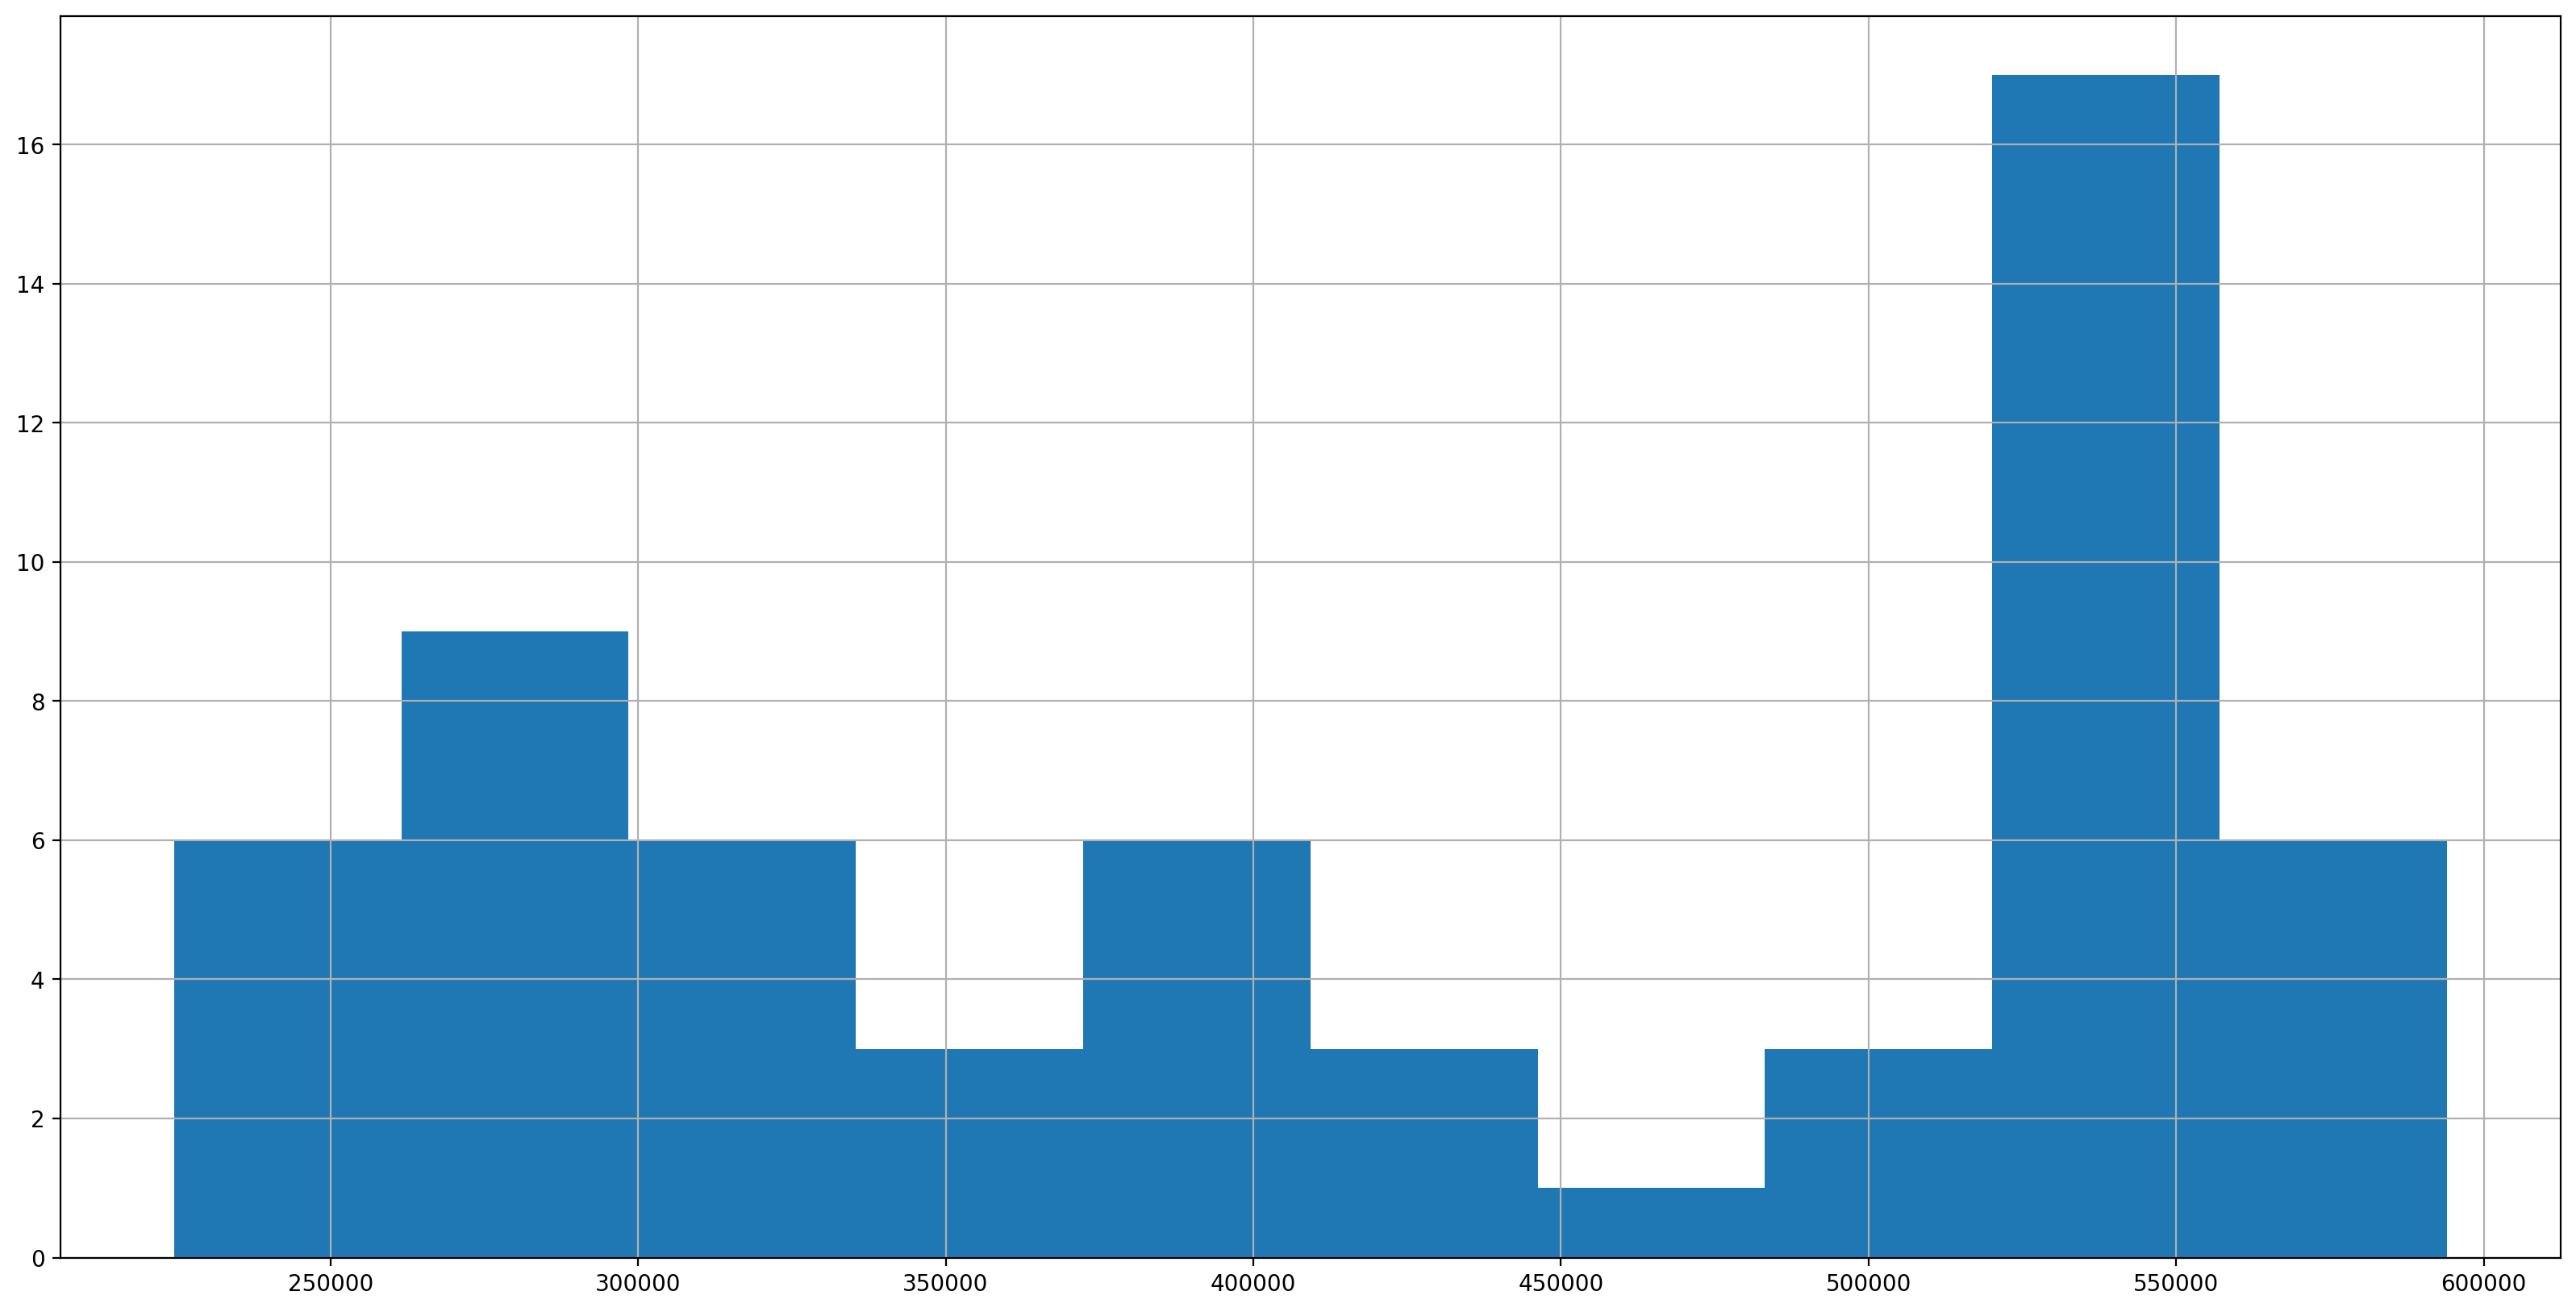

In [138]:
tad['y'].hist()

In [139]:
tad.to_parquet( '../data/output/BLAS_DURAN_GUSTAVO_P1.parquet' )

In [144]:
ruta = '../data/output/BLAS_DURAN_GUSTAVO_P1.parquet'
OUT_P1 = pd.read_parquet(ruta)
OUT_P1

,UM_mes,UM_año,ancla_x,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total,ancla_y,y
0,4,2023,4,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
1,4,2023,5,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
2,5,2023,5,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
3,4,2023,6,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
4,5,2023,6,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
5,6,2023,6,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
6,5,2023,7,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
7,6,2023,7,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
8,7,2023,7,274898,999611,274898,999611,274898.0,999611.0,274898,999611,6,274898.0
9,6,2023,8,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0


In [143]:
OUT_P1.shape

(60, 13)

In [141]:
OUT_P1.head(50)

,UM_mes,UM_año,ancla_x,v_sum_v_retiro_F,v_sum_v_retiro_total,v_min_v_retiro_F,v_min_v_retiro_total,v_mean_v_retiro_F,v_mean_v_retiro_total,v_max_v_retiro_F,v_max_v_retiro_total,ancla_y,y
0,4,2023,4,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
1,4,2023,5,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
2,5,2023,5,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
3,4,2023,6,224561,813565,224561,813565,224561.0,813565.0,224561,813565,3,224561.0
4,5,2023,6,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
5,6,2023,6,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
6,5,2023,7,257228,945171,257228,945171,257228.0,945171.0,257228,945171,4,257228.0
7,6,2023,7,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
8,7,2023,7,274898,999611,274898,999611,274898.0,999611.0,274898,999611,6,274898.0
9,6,2023,8,276584,1010048,276584,1010048,276584.0,1010048.0,276584,1010048,5,276584.0
